In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(r'..\movingrange'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import movingrange
import numpy as np
import pandas as pd

In [3]:
import importlib

In [9]:
importlib.reload(movingrange)

number_of_records = 100
values = np.random.randint(1,51,number_of_records)
periods = range(number_of_records)

x = movingrange.movingrange(8)
x.load_from_arrays(periods, values)

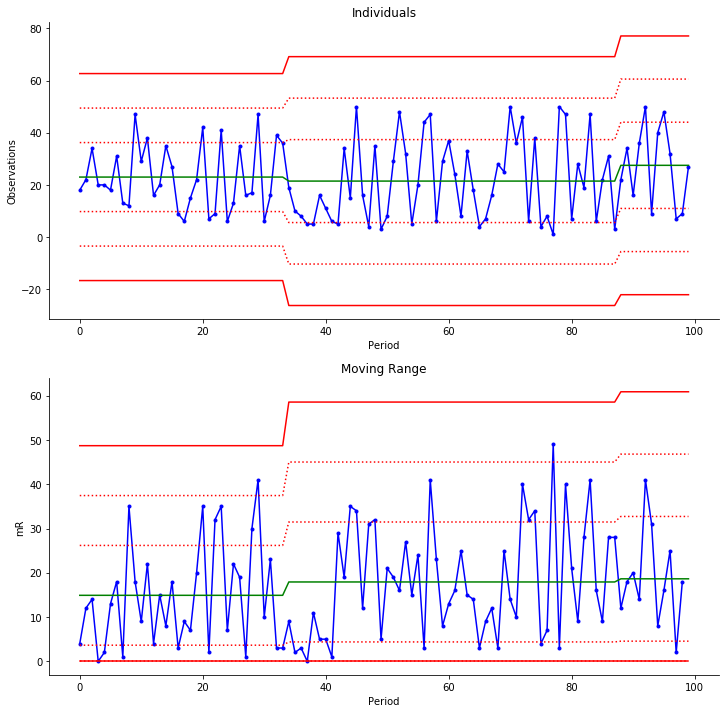

In [10]:
x.plot()

In [11]:
x.rules.basic_rules()

{'Rule 1': [], 'Rule 2': [35, 36, 37, 38, 39, 40, 41, 42, 43]}

In [12]:
x.rules.western_electic_rules()

{'Rule 1': [],
 'Rule 2': [],
 'Rule 3': [],
 'Rule 4': [35, 36, 37, 38, 39, 40, 41, 42, 43]}

In [13]:
x.rules.nelson_rules()

{'Rule 1': [],
 'Rule 2': [35, 36, 37, 38, 39, 40, 41, 42, 43],
 'Rule 3': [],
 'Rule 4': [],
 'Rule 5': [],
 'Rule 6': [],
 'Rule 7': [],
 'Rule 8': []}

In [9]:
x.value_series

array([10, 39, 37, 47, 11,  7, 15, 23, 30, 19, 26, 21, 22, 44, 42, 23,  3,
       46, 31, 37, 44, 34, 32, 13, 24, 45,  3,  9, 33, 42, 14, 18, 48, 21,
       36, 46, 21, 46, 47, 32, 23, 27, 29, 42, 45, 46, 22, 35, 24, 37, 37,
       18, 15, 26, 15, 12, 27,  7, 42, 19,  5, 23, 17, 16, 21, 46, 10, 41,
       38,  2, 35,  6, 29,  2, 26, 24, 48, 30, 49, 34, 42, 19, 41, 43, 27,
       48, 33, 29, 29,  4, 29, 12,  6,  8, 19,  9, 32, 36, 14, 28])

In [14]:
x.describe()

Population
Number of Samples = 100
Population Mean = 22.71
Population Maximum = 50
Population Minimum = 1
Number of Segments = 3

